## Decision Trees and Sparse

Notice that with decision trees, there are different ways to handle categorical data.  In this lab we'll walk through them.

### Working with categories

First let's load up our customer data.

In [2]:
import pandas as pd
df = pd.read_csv('./customer_sparse.csv', index_col=0)

In [3]:
df

,under_thirty,borough,education_level,customer
0,Yes,Manhattan,high school,0
1,Yes,Brooklyn,college grad,0
2,No,Brooklyn,high school,1
3,No,Queens,some college,1
4,No,Queens,high school,1
5,No,Manhattan,law school,0
6,No,Queens,mba,0
7,Yes,Brooklyn,graduate school,0


Now our classification tree can only understand numbers, so let's move through this.

a) Translate all categories, except for `customer`, into type category.

In [7]:
df_cats = df.select_dtypes('object').astype('category')

In [8]:
df_cats.dtypes

# under_thirty       category
# borough            category
# education_level    category
# dtype: object

under_thirty       category
borough            category
education_level    category
dtype: object

b) convert all category values to numbers.

In [10]:

df_coded = df_cats.apply(lambda x: x.cat.codes)

Assign the variables, `X`, and `y`, with the target variable `y` being equal to customer, and all other features set as `X`.

In [11]:
X = df_coded

In [12]:
X.head().to_numpy()

# array([[1, 1, 2],
#        [1, 0, 0],
#        [0, 0, 2],
#        [0, 2, 5],
#        [0, 2, 2]], dtype=int8)

array([[1, 1, 2],
       [1, 0, 0],
       [0, 0, 2],
       [0, 2, 5],
       [0, 2, 2]], dtype=int8)

In [13]:
y = df.customer

y.shape
# (8,)

(8,)

2. Fit the data with decision tree

    * Assign our decision tree to the variable `dtc_1`.

In [15]:
from sklearn.tree import DecisionTreeClassifier
dtc_1 = DecisionTreeClassifier()
dtc_1.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

> Now press shift + enter to view the tree.

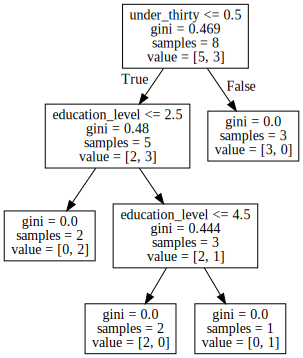

In [16]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


graph_1 = Source(tree.export_graphviz(dtc_1, out_file=None,
                                feature_names=X.columns))

graph_1

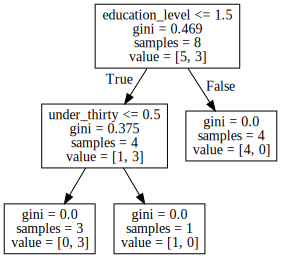

In [27]:
graph_2

Now this may seem pretty good.  After all, we did successfully separate all of our data.  But if we look at our original dataframe, we can see that amount of education should be a strong indicator of whether someone becomes a customer.

In [15]:
df

,under_thirty,borough,education_level,customer
0,Yes,Manhattan,high school,0
1,Yes,Brooklyn,college grad,0
2,No,Brooklyn,high school,1
3,No,Queens,some college,1
4,No,Queens,high school,1
5,No,Manhattan,law school,0
6,No,Queens,mba,0
7,Yes,Brooklyn,graduate school,0


Why was this feature not selected in our decision tree? The problem is that the codes assigned did not correspond to the "amount" of education.  We can see the order of our feature variables by looking at `cat.categories` for the `education_level` column.

In [17]:
df_cats.education_level.cat.categories

Index(['college grad', 'graduate school', 'high school', 'law school', 'mba',
       'some college'],
      dtype='object')

### The ideal coercion

Use the `set_categories` method to place the values in the correct, order:

`['high school', 'some college', 'college grad', 'law school', 'mba', 'graduate school']`

Assign this correctly ordered column to the variable `ordered_edu`.

In [20]:
ordered_edu = df_cats.education_level.cat.set_categories(['high school', 'some college', 'college grad', 'law school', 'mba', 'graduate school'])
ordered_edu

# 0        high school
# 1       college grad
# 2        high school
# 3       some college
# 4        high school
# 5         law school
# 6                mba
# 7    graduate school
# Name: education_level, dtype: category
# Categories (6, object): [high school, some college, college grad, law school, mba, graduate school]

0        high school
1       college grad
2        high school
3       some college
4        high school
5         law school
6                mba
7    graduate school
Name: education_level, dtype: category
Categories (6, object): [high school, some college, college grad, law school, mba, graduate school]

Let's create a new feature matrix called `X_ordered`.  It is just like our X matrix, but the X matrix's `education_level` feature should be updated with the `ordered_edu` category codes.

In [23]:

X['education_level'] = ordered_edu.cat.codes

Now that education level values are correctly ordered, let's fit the `X_ordered` data to a classifier called `dtc_2`.

In [24]:
dtc_2 = DecisionTreeClassifier()
dtc_2.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Press shift + enter on the code below to see the updated decision tree.

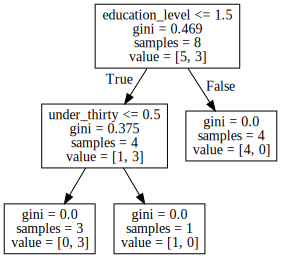

In [26]:
from sklearn import tree
from IPython.display import SVG, display
from graphviz import Source 


graph_2 = Source(tree.export_graphviz(dtc_2, out_file=None,
                                feature_names=X.columns))

graph_2

We can see that this time our decision tree separated based on the `education_level` feature in the first level.

### Discussion Questions

Compare the two techniques.  Which decision tree do you prefer?

### Resources

[Decision Trees and Sparse](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)